## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.decomposition import PCA
#from sqlalchemy import create_engine
#import pymysql

## Loading the data

In [2]:
data = pd.read_csv("middleSchoolData.csv", delimiter=',')
data.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,NaN,NaN,NaN,42.5,82.1,2.8,106.0,NaN,0.33,0.20


In [3]:
data.shape

(594, 24)

In [4]:
data.columns.values

array(['dbn', 'school_name', 'applications', 'acceptances',
       'per_pupil_spending', 'avg_class_size', 'asian_percent',
       'black_percent', 'hispanic_percent', 'multiple_percent',
       'white_percent', 'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size',
       'student_achievement', 'reading_scores_exceed',
       'math_scores_exceed'], dtype=object)

## Imputing the data

In [5]:
for i in data.columns.values[2:]:
    data[i].fillna(data[i].median(), inplace=True)
    
data.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,3.61,3.62,3.64,42.5,82.1,2.8,106.0,3.41,0.33,0.20


### Q1: What is the correlation between the number of applications and admissions to HSPHS?

In [6]:
data_corr = data.iloc[:, 2:4]
data_corr.corr()

,applications,acceptances
applications,1.000000,0.801727
acceptances,0.801727,1.000000


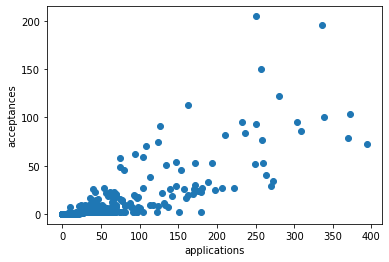

In [7]:
plt.ylabel('acceptances')
plt.xlabel('applications')
plt.scatter(data['applications'], data['acceptances'])
plt.show()

### Q2: What is a better predictor of admission to HSPHS? Number of applications or application rate?

In [8]:
application_rate = data['applications'] / data['school_size']
data.insert(3, "application_rate", application_rate)
data.head()

,dbn,school_name,applications,application_rate,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0.018018,0,24890.0,20.15,3.3,31.8,61.3,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0.016173,0,23536.0,24.56,5.7,12.4,78.7,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,0.097953,23,16206.0,29.69,69.4,3.7,13.5,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0.000000,0,21960.0,24.09,1.8,29.3,66.1,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0.103774,0,25444.0,15.80,3.8,32.1,54.7,...,3.61,3.62,3.64,42.5,82.1,2.8,106.0,3.41,0.33,0.20


In [9]:
data_corr = data.iloc[:, 2:5]
data_corr.corr()

,applications,application_rate,acceptances
applications,1.000000,0.754667,0.801727
application_rate,0.754667,1.000000,0.656197
acceptances,0.801727,0.656197,1.000000


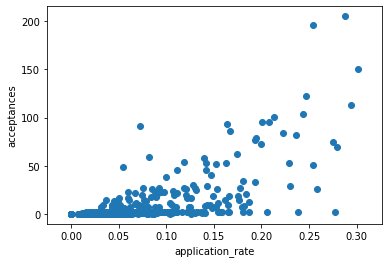

In [10]:
plt.ylabel('acceptances')
plt.xlabel('application_rate')
plt.scatter(data['application_rate'], data['acceptances'])
plt.show()

Raw number of applications is a better predictor of HSPHS admissions than application rate.

### Q3: Which school has the best per student odds of sending someone to HSPHS?

In [11]:
acceptance_rate = data['acceptances'] / data['school_size']
data.insert(5, "acceptance_rate", acceptance_rate)

per_student_odds = data['acceptance_rate'] / (1 - data['acceptance_rate'])
data.insert(6, "per_student_odds", per_student_odds)
data.head()

,dbn,school_name,applications,application_rate,acceptances,acceptance_rate,per_student_odds,per_pupil_spending,avg_class_size,asian_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0.018018,0,0.000000,0.000000,24890.0,20.15,3.3,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0.016173,0,0.000000,0.000000,23536.0,24.56,5.7,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,0.097953,23,0.033626,0.034796,16206.0,29.69,69.4,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0.000000,0,0.000000,0.000000,21960.0,24.09,1.8,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0.103774,0,0.000000,0.000000,25444.0,15.80,3.8,...,3.61,3.62,3.64,42.5,82.1,2.8,106.0,3.41,0.33,0.20


In [12]:
i = data['per_student_odds'].idxmax(axis = 0)
best_odds = data.iloc[i]['per_student_odds']
best_school = data.iloc[i]['school_name']

print(best_odds, best_school)

0.3068862275449102 THE CHRISTA MCAULIFFE SCHOOL\I.S. 187


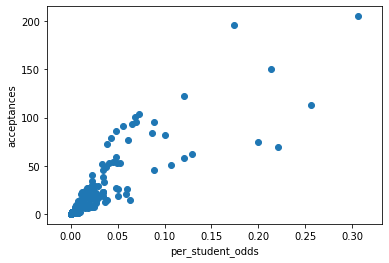

In [13]:
plt.ylabel('acceptances')
plt.xlabel('per_student_odds')
plt.scatter(data['per_student_odds'], data['acceptances'])
plt.show()

THE CHRISTA MCAULIFFE SCHOOL\I.S. 187 has the best per student odds of getting accepted into an HSPHS at 0.3069.

### Q4: Is there a relationship between how students perceive their school and how the school performs on objective measures of achievement.

In [14]:
iv = data[['rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust']]
dv = data[['student_achievement', 'reading_scores_exceed',
       'math_scores_exceed']]

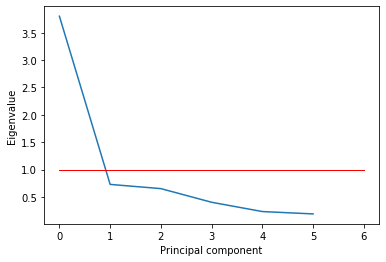

In [15]:
# Z-score the IV data:
iv_zscored_data = stats.zscore(iv)

# Run the PCA:
pca = PCA()
pca.fit(iv_zscored_data)

# eig_vals: Single vector of eigenvalues in decreasing order of magnitude
eig_vals = pca.explained_variance_

# loadings: Weights per factor in terms of the original data.
loadings = pca.components_

# rotated-data
rotated_data = pca.fit_transform(iv_zscored_data)

covar_explained = eig_vals/sum(eig_vals)*100

# Screeplot: Plotting a bar graph of the sorted Eigenvalues
iv_classes = 6

plt.plot(eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,iv_classes],[1,1],color='red',linewidth=1) # Kaiser criterion line

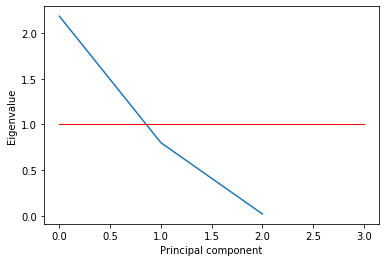

In [16]:
# Z-score the IV data:
dv_zscored_data = stats.zscore(dv)

# Run the PCA:
pca = PCA()
pca.fit(dv_zscored_data)

# eig_vals: Single vector of eigenvalues in decreasing order of magnitude
eig_vals = pca.explained_variance_

# loadings: Weights per factor in terms of the original data.
loadings = pca.components_

# rotated-data
rotated_data = pca.fit_transform(dv_zscored_data)

covar_explained = eig_vals/sum(eig_vals)*100

# Screeplot: Plotting a bar graph of the sorted Eigenvalues
dv_classes = 3

plt.plot(eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,dv_classes],[1,1],color='red',linewidth=1) # Kaiser criterion line

In [17]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(iv_zscored_data)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['X'])
principalDf.head()

,X
0,4.648744
1,1.212160
2,2.013596
3,-3.671796
4,-0.170035


In [18]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dv_zscored_data)
principalDf_dv = pd.DataFrame(data = principalComponents, 
                           columns = ['Y'])
principalDf_dv.head()

,Y
0,-1.335761
1,-1.459684
2,2.215840
3,-0.529935
4,-1.115412


In [19]:
q4_data = pd.concat([principalDf, principalDf_dv], axis=1)

In [20]:
results = smf.ols('Y ~ X', data=q4_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     84.51
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           6.43e-19
Time:                        12:45:54   Log-Likelihood:                -1034.9
No. Observations:                 594   AIC:                             2074.
Df Residuals:                     592   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.857e-17      0.057  -8.55e-16      1.000      -0.112       0.112
X             -0.2680      0.029     -9.193      0.000      -0.325      -0.211
==============================================================================
Omnibus:                       33.034   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.616
Skew:                           0.574   Prob(JB):                     1.85e-08
Kurtosis:                       2.655   Cond. No.                         1.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
data_corr = q4_data[['X', 'Y']]
data_corr.corr()

,X,Y
X,1.000000,-0.353444
Y,-0.353444,1.000000


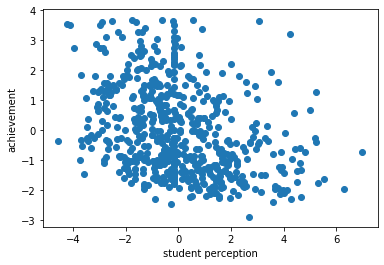

In [22]:
plt.ylabel('achievement')
plt.xlabel('student perception')
plt.scatter(q4_data['X'], q4_data['Y'])
plt.show()

### Q5: Testing a hypothesis - Do more colored schools get more or less acceptances to HSPHS? 

In [23]:
data['diverse_percent'] = data['asian_percent'] + data['black_percent'] + data['hispanic_percent'] + data['multiple_percent']
pd.set_option('display.max_columns', None)  
data.head()

,dbn,school_name,applications,application_rate,acceptances,acceptance_rate,per_student_odds,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,diverse_percent
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0.018018,0,0.000000,0.000000,24890.0,20.15,3.3,31.8,61.3,0.9,2.7,2.04,2.40,2.30,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26,97.3
1,01M140,P.S. 140 NATHAN STRAUS,6,0.016173,0,0.000000,0.000000,23536.0,24.56,5.7,12.4,78.7,0.5,2.7,3.41,3.25,2.50,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24,97.3
2,01M184,P.S. 184M SHUANG WEN,67,0.097953,23,0.033626,0.034796,16206.0,29.69,69.4,3.7,13.5,6.1,7.3,2.98,2.96,3.68,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74,92.7
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0.000000,0,0.000000,0.000000,21960.0,24.09,1.8,29.3,66.1,0.0,2.8,3.87,4.25,3.79,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24,97.2
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0.103774,0,0.000000,0.000000,25444.0,15.80,3.8,32.1,54.7,3.8,5.7,3.66,3.73,3.51,3.61,3.62,3.64,42.5,82.1,2.8,106.0,3.41,0.33,0.20,94.4


In [24]:
def diversity(percent):
    from statistics import median
    percent_median = median(data['diverse_percent'])
    if percent > percent_median:
        return "diverse"
    else: 
        return "not diverse"
    
data['diversity'] = data.apply(lambda row: diversity(row.diverse_percent), axis = 1)
data.head()

,dbn,school_name,applications,application_rate,acceptances,acceptance_rate,per_student_odds,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,diverse_percent,diversity
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0.018018,0,0.000000,0.000000,24890.0,20.15,3.3,31.8,61.3,0.9,2.7,2.04,2.40,2.30,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26,97.3,not diverse
1,01M140,P.S. 140 NATHAN STRAUS,6,0.016173,0,0.000000,0.000000,23536.0,24.56,5.7,12.4,78.7,0.5,2.7,3.41,3.25,2.50,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24,97.3,not diverse
2,01M184,P.S. 184M SHUANG WEN,67,0.097953,23,0.033626,0.034796,16206.0,29.69,69.4,3.7,13.5,6.1,7.3,2.98,2.96,3.68,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74,92.7,not diverse
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0.000000,0,0.000000,0.000000,21960.0,24.09,1.8,29.3,66.1,0.0,2.8,3.87,4.25,3.79,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24,97.2,not diverse
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0.103774,0,0.000000,0.000000,25444.0,15.80,3.8,32.1,54.7,3.8,5.7,3.66,3.73,3.51,3.61,3.62,3.64,42.5,82.1,2.8,106.0,3.41,0.33,0.20,94.4,not diverse


In [25]:
data['diversity'].value_counts()

not diverse    298
diverse        296
Name: diversity, dtype: int64

In [26]:
diverse_df = data[data['diversity'] == 'diverse']
not_diverse_df = data[data['diversity'] == 'not diverse']

total_acceptances = data['acceptances'].sum()

diverse_acceptances = diverse_df['acceptances'].sum()
expected_diverse = total_acceptances*(296/594)

not_diverse_acceptances = not_diverse_df['acceptances'].sum()
expected_not_diverse = total_acceptances*(298/594)

In [27]:
table = [[diverse_acceptances, not_diverse_acceptances], [expected_diverse, expected_not_diverse]] 

chi_square = 0
for i in range(len(table[0])):
    chi_square += (table[0][i] - table[1][i])**2 / table[1][i]
    
print(chi_square)

2911.638115832102


In [28]:
from scipy.stats import chi2_contingency 

# defining the table 
stat, p, dof, expected = chi2_contingency(table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [29]:
print(diverse_acceptances, not_diverse_acceptances, expected_diverse, expected_not_diverse)

421 4040 2222.989898989899 2238.010101010101


### Q6: Is there any evidence that the availability of material resources impacts objective measures of achievement or admission to HSPHS?

In [30]:
data_corr = data[['per_pupil_spending', 'acceptances']]
data_corr.corr()

,per_pupil_spending,acceptances
per_pupil_spending,1.000000,-0.321175
acceptances,-0.321175,1.000000


In [31]:
results = smf.ols('acceptances ~ per_pupil_spending', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            acceptances   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     68.09
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.02e-15
Time:                        12:45:54   Log-Likelihood:                -2622.6
No. Observations:                 594   AIC:                             5249.
Df Residuals:                     592   BIC:                             5258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             47.6749      4.936      9.658      0.000      37.980      57.370
per_pupil_spending    -0.0019      0.000     -8.252      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      624.851   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28509.566
Skew:                           4.913   Prob(JB):                         0.00
Kurtosis:                      35.486   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

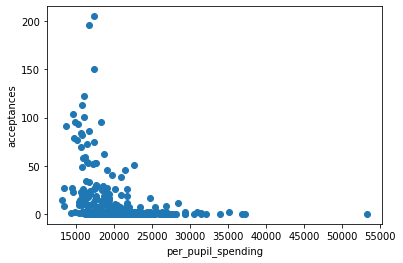

In [32]:
plt.ylabel('acceptances')
plt.xlabel('per_pupil_spending')
plt.scatter(data['per_pupil_spending'], data['acceptances'])
plt.show()

### Q7: What proportion of schools accounts for 90% of all students accepted to HSPHS?

In [33]:
sorted_data = data.sort_values(by=['acceptances'], ascending=False)
sorted_data.head()

,dbn,school_name,applications,application_rate,acceptances,acceptance_rate,per_student_odds,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,diverse_percent,diversity
304,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,251,0.287514,205,0.234822,0.306886,17403.0,27.71,67.5,1.3,6.8,0.6,23.9,4.84,4.48,4.44,4.16,3.74,4.17,11.3,65.8,3.3,873.0,4.36,0.90,0.90,76.2,not diverse
324,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,336,0.254160,196,0.148260,0.174067,16814.0,30.51,27.8,6.9,5.7,8.2,51.4,4.07,4.50,3.90,3.77,3.49,3.77,11.9,37.7,1.1,1322.0,4.16,0.88,0.88,48.6,not diverse
33,03M054,J.H.S. 054 BOOKER T. WASHINGTON,257,0.301643,150,0.176056,0.213675,17359.0,25.47,11.0,8.6,14.7,8.0,57.7,4.42,3.85,4.13,3.62,4.45,3.52,11.5,23.8,1.1,852.0,4.14,0.89,0.88,42.3,not diverse
241,15K051,M.S. 51 WILLIAM ALEXANDER,280,0.246479,122,0.107394,0.120316,16145.0,25.36,16.4,7.6,20.4,4.7,51.0,3.56,3.81,4.03,3.83,3.10,3.31,17.7,28.7,2.2,1136.0,4.05,0.83,0.83,49.1,not diverse
22,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,163,0.294224,113,0.203971,0.256236,15853.0,31.83,55.1,2.0,6.5,6.5,30.0,3.60,4.21,4.22,3.27,4.08,4.03,16.4,38.3,1.4,554.0,4.34,0.88,0.89,70.1,not diverse


In [34]:
percent_acceptances_90 = total_acceptances*0.9

percent_acceptances_counter = 0
counter = 0
for i in range(len(sorted_data['acceptances'])):
    percent_acceptances_counter += sorted_data.iloc[i]['acceptances']
    counter += 1
    if percent_acceptances_counter >= percent_acceptances_90:
        break
        
print(counter / len(sorted_data['school_name']))

0.20707070707070707


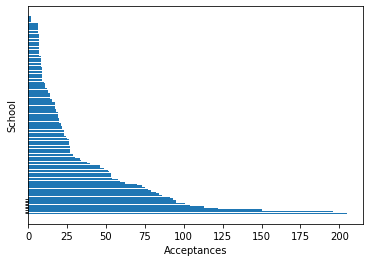

In [35]:
schools = sorted_data.iloc[0:124]['school_name']
acceptances = sorted_data.iloc[0:124]['acceptances']

plt.barh(schools, acceptances)
plt.xlabel('Acceptances')
plt.ylabel('School')
plt.yticks(np.arange(10), '')
plt.show()

### Q8: A model that includes all factors as to what school characteristics are most important in terms of a) sending students to HSPHS.

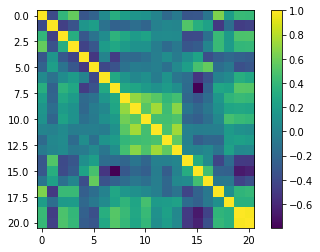

In [36]:
numeric_data = data.drop(['dbn', 'school_name', 'acceptances','application_rate', 'acceptance_rate', 'per_student_odds', 'diverse_percent', 'diversity'], axis=1)

r = np.corrcoef(numeric_data,rowvar=False)

# Plot the data:
plt.imshow(r) 
plt.colorbar()

In [37]:
# Z-score the data:
zscored_data = stats.zscore(numeric_data)

# Run the PCA:
pca = PCA()
pca.fit(zscored_data)

# eig_vals: Single vector of eigenvalues in decreasing order of magnitude
eig_vals = pca.explained_variance_

# loadings: Weights per factor in terms of the original data.
loadings = pca.components_

# rotated-data: 594 rows in terms of 21 factors ordered by decreasing eigenvalue
rotated_data = pca.fit_transform(zscored_data)

covar_explained = eig_vals/sum(eig_vals)*100

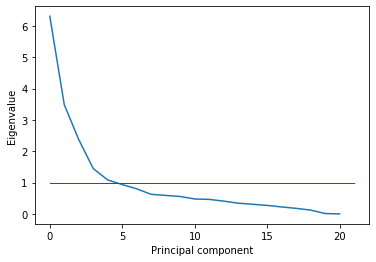

In [38]:
# Screeplot: Plotting a bar graph of the sorted Eigenvalues
num_classes = 21

plt.plot(eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,num_classes],[1,1],color='red',linewidth=1) # Kaiser criterion line

In [39]:
n_draws = 10000
num_rows = 594
num_columns = 21
eig_sata = np.empty([n_draws,num_columns])
eig_sata[:] = np.NaN

for i in range(n_draws):
    # Draw the sata from a normal distribution:
    sata = np.random.normal(0,1,[num_rows,num_columns]) 
    # Run the PCA on the sata:
    pca = PCA()
    pca.fit(sata)
    # Keep the eigenvalues:
    temp = pca.explained_variance_
    eig_sata[i] = temp

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


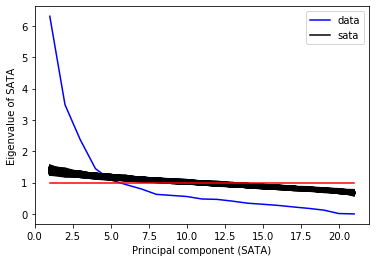

In [40]:
plt.plot(np.linspace(1,num_columns,num_columns),eig_vals,color='blue') # plot eig_vals from section 4
plt.plot(np.linspace(1,num_columns,num_columns),np.transpose(eig_sata),color='black') # plot eig_sata
plt.plot([1,num_columns],[1,1],color='red') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])

Text(0, 0.5, 'Loading')

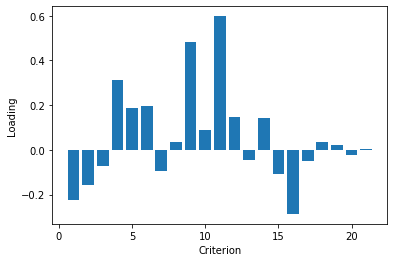

In [41]:
which_principal_component = 1

plt.bar(np.linspace(1,21,21),loadings[:,which_principal_component])
plt.xlabel('Criterion')
plt.ylabel('Loading')

# Criteria -- GENERAL

Text(0, 0.5, 'Loading')

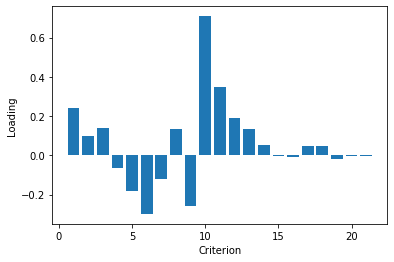

In [42]:
which_principal_component = 2

plt.bar(np.linspace(1,21,21),loadings[:,which_principal_component])
plt.xlabel('Criterion')
plt.ylabel('Loading')

# Criteria 10,11,12 -- School Environment & Support

Text(0, 0.5, 'Loading')

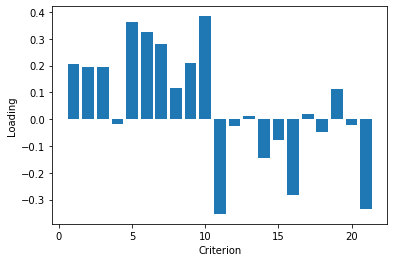

In [43]:
which_principal_component = 3

plt.bar(np.linspace(1,21,21),loadings[:,which_principal_component])
plt.xlabel('Criterion')
plt.ylabel('Loading')

# Criteria 5,6,7,10 -- Race & Support

Text(0, 0.5, 'Loading')

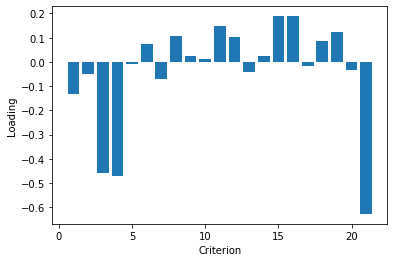

In [44]:
which_principal_component = 4

plt.bar(np.linspace(1,21,21),loadings[:,which_principal_component])
plt.xlabel('Criterion')
plt.ylabel('Loading')

# Criteria 15,16 -- Other Hindering Factors: Poverty, Disability

Text(0, 0.5, 'Loading')

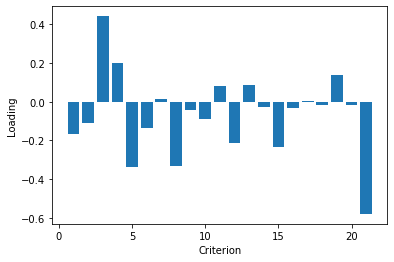

In [45]:
which_principal_component = 5

plt.bar(np.linspace(1,21,21),loadings[:,which_principal_component])
plt.xlabel('Criterion')
plt.ylabel('Loading')

# Criteria 3,4,19 -- Other High-Achievement Factors

In [46]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(zscored_data)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf['acceptances'] = data['acceptances']
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,acceptances
0,-4.494645,2.732912,-0.666828,1.437003,-0.260393,0
1,-2.520162,0.093825,0.887457,0.812555,0.414734,0
2,2.768415,3.570770,0.457048,0.580256,-0.363588,23
3,-0.226972,-4.578913,1.008429,-0.151506,-0.102912,0
4,-2.196488,-1.529996,-1.151583,1.653816,1.055517,0


In [47]:
X = principalDf[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values.reshape(-1,5)
y = principalDf['acceptances'].values.reshape(-1,1)

results = smf.ols('y ~ X', data=principalDf).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.75e-86
Time:                        12:46:20   Log-Likelihood:                -2448.1
No. Observations:                 594   AIC:                             4908.
Df Residuals:                     588   BIC:                             4935.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5101      0.615     12.208      0.000       6.302       8.718
X[0]           4.6974      0.245     19.166      0.000       4.216       5.179
X[1]           3.2298      0.330      9.794      0.000       2.582       3.877
X[2]           2.3904      0.400      5.979      0.000       1.605       3.176
X[3]          -0.3013      0.512     -0.589      0.556      -1.307       0.704
X[4]           5.6765      0.591      9.602      0.000       4.515       6.837
==============================================================================
Omnibus:                      591.125   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34619.053
Skew:                           4.345   Prob(JB):                         0.00
Kurtosis:                      39.376   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
y_data = numeric_data[['student_achievement', 'reading_scores_exceed','math_scores_exceed']]

# Z-score the data:
zscored_y = stats.zscore(y_data)

# Run the PCA:
pca = PCA()
pca.fit(zscored_y)

# eig_vals: Single vector of eigenvalues in decreasing order of magnitude
eig_vals = pca.explained_variance_

# loadings: Weights per factor in terms of the original data.
loadings = pca.components_

# rotated-data: 594 rows in terms of 21 factors ordered by decreasing eigenvalue
rotated_data = pca.fit_transform(zscored_y)

covar_explained = eig_vals/sum(eig_vals)*100

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(zscored_y)
principalDf_y = pd.DataFrame(data = principalComponents, 
                           columns = ['Y'])

In [49]:
principalDf['student_achievement'] = numeric_data['student_achievement']
principalDf['reading_scores_exceed'] = numeric_data['reading_scores_exceed']
principalDf['math_scores_exceed'] = numeric_data['math_scores_exceed']

X = principalDf[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values.reshape(-1,5)
Y = principalDf_y[['Y']].values.reshape(-1,1)

results = smf.ols('Y ~ X', data=principalDf).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     715.9
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          2.71e-247
Time:                        12:46:20   Log-Likelihood:                -492.93
No. Observations:                 594   AIC:                             997.9
Df Residuals:                     588   BIC:                             1024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.469e-17      0.023   1.52e-15      1.000      -0.045       0.045
X[0]           0.5128      0.009     56.255      0.000       0.495       0.531
X[1]           0.0774      0.012      6.310      0.000       0.053       0.101
X[2]          -0.0505      0.015     -3.397      0.001      -0.080      -0.021
X[3]           0.0898      0.019      4.715      0.000       0.052       0.127
X[4]          -0.4062      0.022    -18.476      0.000      -0.449      -0.363
==============================================================================
Omnibus:                       63.420   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.881
Skew:                           0.644   Prob(JB):                     2.07e-27
Kurtosis:                       4.819   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""